Business Analytics Model On a sales Dataset using the Random Forest Classifier

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_dataset.csv')

In [3]:
print(df.isnull().sum()) #identifying missing values

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [5]:
df. head(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,6/27/2023,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,12/27/2024,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,7/25/2021,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,6/27/2023,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,12/27/2024,Connor Morgan,Illinois,Chicago,2024-12


In [6]:
df.Category.unique()

array(['Electronics', 'Office Supplies', 'Furniture'], dtype=object)

In [7]:
df["Sub-Category"].unique()

array(['Electronic Games', 'Printers', 'Pens', 'Laptops', 'Tables',
       'Chairs', 'Markers', 'Sofas', 'Paper', 'Binders', 'Phones',
       'Bookcases'], dtype=object)

In [8]:
df.PaymentMode.unique()

array(['UPI', 'Debit Card', 'EMI', 'Credit Card', 'COD'], dtype=object)

In [9]:
df.State.unique()

array(['Florida', 'Illinois', 'New York', 'California', 'Texas', 'Ohio'],
      dtype=object)

In [10]:
df.City.unique()

array(['Miami', 'Chicago', 'Buffalo', 'Orlando', 'Los Angeles',
       'New York City', 'Springfield', 'Rochester', 'Dallas', 'San Diego',
       'Austin', 'San Francisco', 'Columbus', 'Cincinnati', 'Cleveland',
       'Houston', 'Tampa', 'Peoria'], dtype=object)

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Extract Day, Month, and Year into new columns
# df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [12]:
df = df.drop(["Order Date", "Year-Month", "Order ID", "CustomerName"], axis=1)

In [13]:
df.head()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,State,City,Order Month,Order Year
0,9726,1275,5,Electronics,Electronic Games,UPI,Florida,Miami,6,2023
1,9726,1275,5,Electronics,Electronic Games,UPI,Illinois,Chicago,12,2024
2,9726,1275,5,Electronics,Electronic Games,UPI,New York,Buffalo,7,2021
3,4975,1330,14,Electronics,Printers,UPI,Florida,Miami,6,2023
4,4975,1330,14,Electronics,Printers,UPI,Illinois,Chicago,12,2024


In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Category', 'Sub-Category', 'PaymentMode', 'State', 'City']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
df.head()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,State,City,Order Month,Order Year
0,9726,1275,5,0,3,4,1,9,6,2023
1,9726,1275,5,0,3,4,2,2,12,2024
2,9726,1275,5,0,3,4,3,1,7,2021
3,4975,1330,14,0,9,4,1,9,6,2023
4,4975,1330,14,0,9,4,2,2,12,2024


In [16]:
df.tail(5)

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,State,City,Order Month,Order Year
1189,8825,3594,15,1,11,2,3,10,7,2024
1190,2082,642,8,0,8,3,3,13,6,2020
1191,2082,642,8,0,8,3,5,0,12,2022
1192,2082,642,8,0,8,3,3,1,8,2020
1193,914,163,13,2,5,4,2,2,10,2024


In [17]:
df.isnull().sum()

Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
State           0
City            0
Order Month     0
Order Year      0
dtype: int64

DATA PREPARATION STEPS


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Amount        1194 non-null   int64
 1   Profit        1194 non-null   int64
 2   Quantity      1194 non-null   int64
 3   Category      1194 non-null   int64
 4   Sub-Category  1194 non-null   int64
 5   PaymentMode   1194 non-null   int64
 6   State         1194 non-null   int64
 7   City          1194 non-null   int64
 8   Order Month   1194 non-null   int32
 9   Order Year    1194 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 84.1 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,1194.0,5178.089615,2804.921955,508.0,2799.0,5152.0,7626.0,9992.0
Profit,1194.0,1348.992462,1117.992573,50.0,410.0,1014.0,2035.0,4930.0
Quantity,1194.0,10.674204,5.777102,1.0,6.0,11.0,16.0,20.0
Category,1194.0,1.009213,0.812155,0.0,0.0,1.0,2.0,2.0
Sub-Category,1194.0,5.891960,3.390617,0.0,3.0,6.0,9.0,11.0
PaymentMode,1194.0,2.043551,1.390223,0.0,1.0,2.0,3.0,4.0
State,1194.0,2.432998,1.711639,0.0,1.0,2.0,4.0,5.0
City,1194.0,8.517588,5.284380,0.0,4.0,9.0,13.0,17.0
Order Month,1194.0,6.712730,3.487550,1.0,4.0,7.0,10.0,12.0
Order Year,1194.0,2022.240369,1.424847,2020.0,2021.0,2022.0,2023.0,2025.0


Correlation Matrix (Raw):
                 Amount    Profit  Quantity  Category  Sub-Category  \
Amount        1.000000  0.675285  0.044631 -0.008060      0.005322   
Profit        0.675285  1.000000  0.066088  0.016761     -0.039911   
Quantity      0.044631  0.066088  1.000000 -0.058851     -0.005094   
Category     -0.008060  0.016761 -0.058851  1.000000     -0.127790   
Sub-Category  0.005322 -0.039911 -0.005094 -0.127790      1.000000   
PaymentMode  -0.046999  0.017636  0.020763  0.014492      0.005978   
State        -0.001241 -0.021411  0.006988 -0.074025      0.019622   
City          0.038170  0.038818 -0.011880  0.038927     -0.091752   
Order Month   0.008322 -0.027834  0.020521  0.035856      0.018710   
Order Year   -0.000468  0.031822  0.004634  0.001707     -0.027760   

              PaymentMode     State      City  Order Month  Order Year  
Amount          -0.046999 -0.001241  0.038170     0.008322   -0.000468  
Profit           0.017636 -0.021411  0.038818    -0.0278

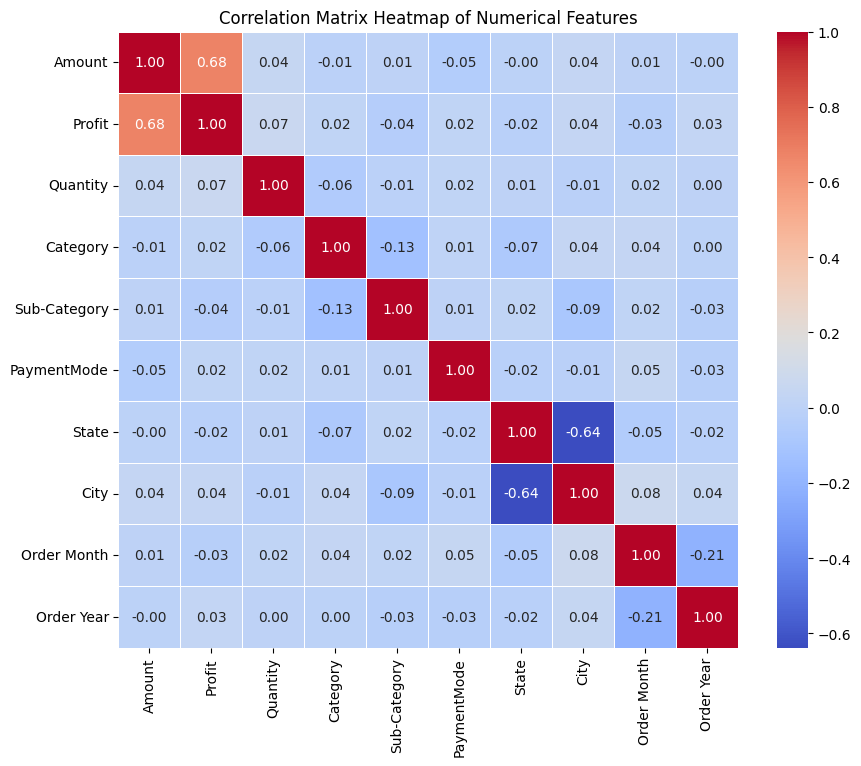

In [20]:
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print("Correlation Matrix (Raw):\n", correlation_matrix)

plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()

In [21]:
# Spliting the data into features and target
X = df.drop(columns=['Profit'])
y = df['Profit']

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Building and training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
y_pred[:10]

array([ 458.28,  267.94, 1899.13, 1293.67, 1829.53,  614.42, 1001.66,
       1273.02, 2154.33, 1312.72])

In [26]:
y_test[:10].values

array([ 104,   73, 1836, 2211,  451, 1470,  576, 1849, 1010, 1153])

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error


In [28]:
print("--- Model Evaluation ---")

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared (R2 Score): {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

--- Model Evaluation ---

R-squared (R2 Score): 0.4740

Mean Squared Error (MSE): 634780.88

Root Mean Squared Error (RMSE): 796.73

Mean Absolute Error (MAE): 581.30


### Predicted vs. Actual Values Scatter Plot

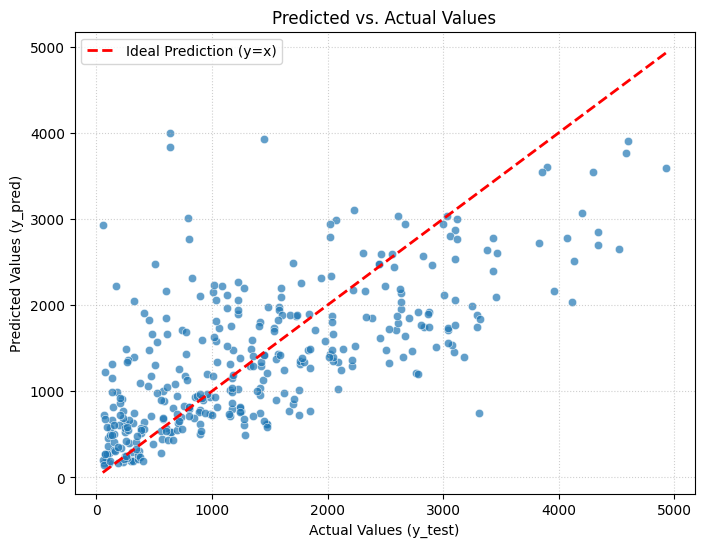

In [29]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Ideal Prediction (y=x)')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()


In [30]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'encoders.pkl')

['encoders.pkl']

Checking for Accuracy